## Load Dataset

In [7]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [8]:
TARGET_FILE = 'london_weekdays.csv'
traindata = pd.read_csv(TARGET_FILE)
traindata.head()

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,0,570.098074,Entire home/apt,False,False,2.0,False,0,0,10.0,98.0,1,5.301018,1.588990,209.632578,14.571793,467.597522,8.372724,-0.16032,51.46531
1,1,297.984430,Private room,False,True,2.0,True,1,0,10.0,99.0,1,2.198946,0.379262,553.891744,38.501630,961.472137,17.215961,-0.09683,51.50343
2,2,336.790611,Private room,False,True,2.0,False,1,0,10.0,96.0,1,2.322958,0.453178,428.287849,29.770764,959.042839,17.172462,-0.10554,51.52407
3,3,226.722171,Private room,False,True,2.0,True,1,0,10.0,99.0,1,5.707825,1.723977,195.694744,13.602959,452.232472,8.097600,-0.16575,51.46292
4,4,256.355982,Private room,False,True,3.0,False,0,0,9.0,98.0,1,3.257945,0.825417,329.477068,22.902317,735.327280,13.166649,-0.12055,51.53728


In [9]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4614 entries, 0 to 4613
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  4614 non-null   int64  
 1   realSum                     4614 non-null   float64
 2   room_type                   4614 non-null   object 
 3   room_shared                 4614 non-null   bool   
 4   room_private                4614 non-null   bool   
 5   person_capacity             4614 non-null   float64
 6   host_is_superhost           4614 non-null   bool   
 7   multi                       4614 non-null   int64  
 8   biz                         4614 non-null   int64  
 9   cleanliness_rating          4614 non-null   float64
 10  guest_satisfaction_overall  4614 non-null   float64
 11  bedrooms                    4614 non-null   int64  
 12  dist                        4614 non-null   float64
 13  metro_dist                  4614 

## Numeric Variables

Column Name | Description
----------- | -----------
realSum | The total price of the Airbnb listing. (Numeric)
person_capacity | The maximum number of people that can be accommodated in a single listing. (Numeric)
cleanliness_rating | The rating associated with how clean an individual property was after guests stayed at it. (Numeric)
guest_satisfaction_overall | The overall rating which shows how satisfied are guests with their stay after visiting an Airbnb property. (Numeric)
dist | Distance from city centre associated with every rental property. (Measurement may vary depending upon scale eg kilometers/miles etc )
metro_dist | Distance from metro station associated with every rental property. (Measurement may vary depending upon scale eg kilometers/miles etc )

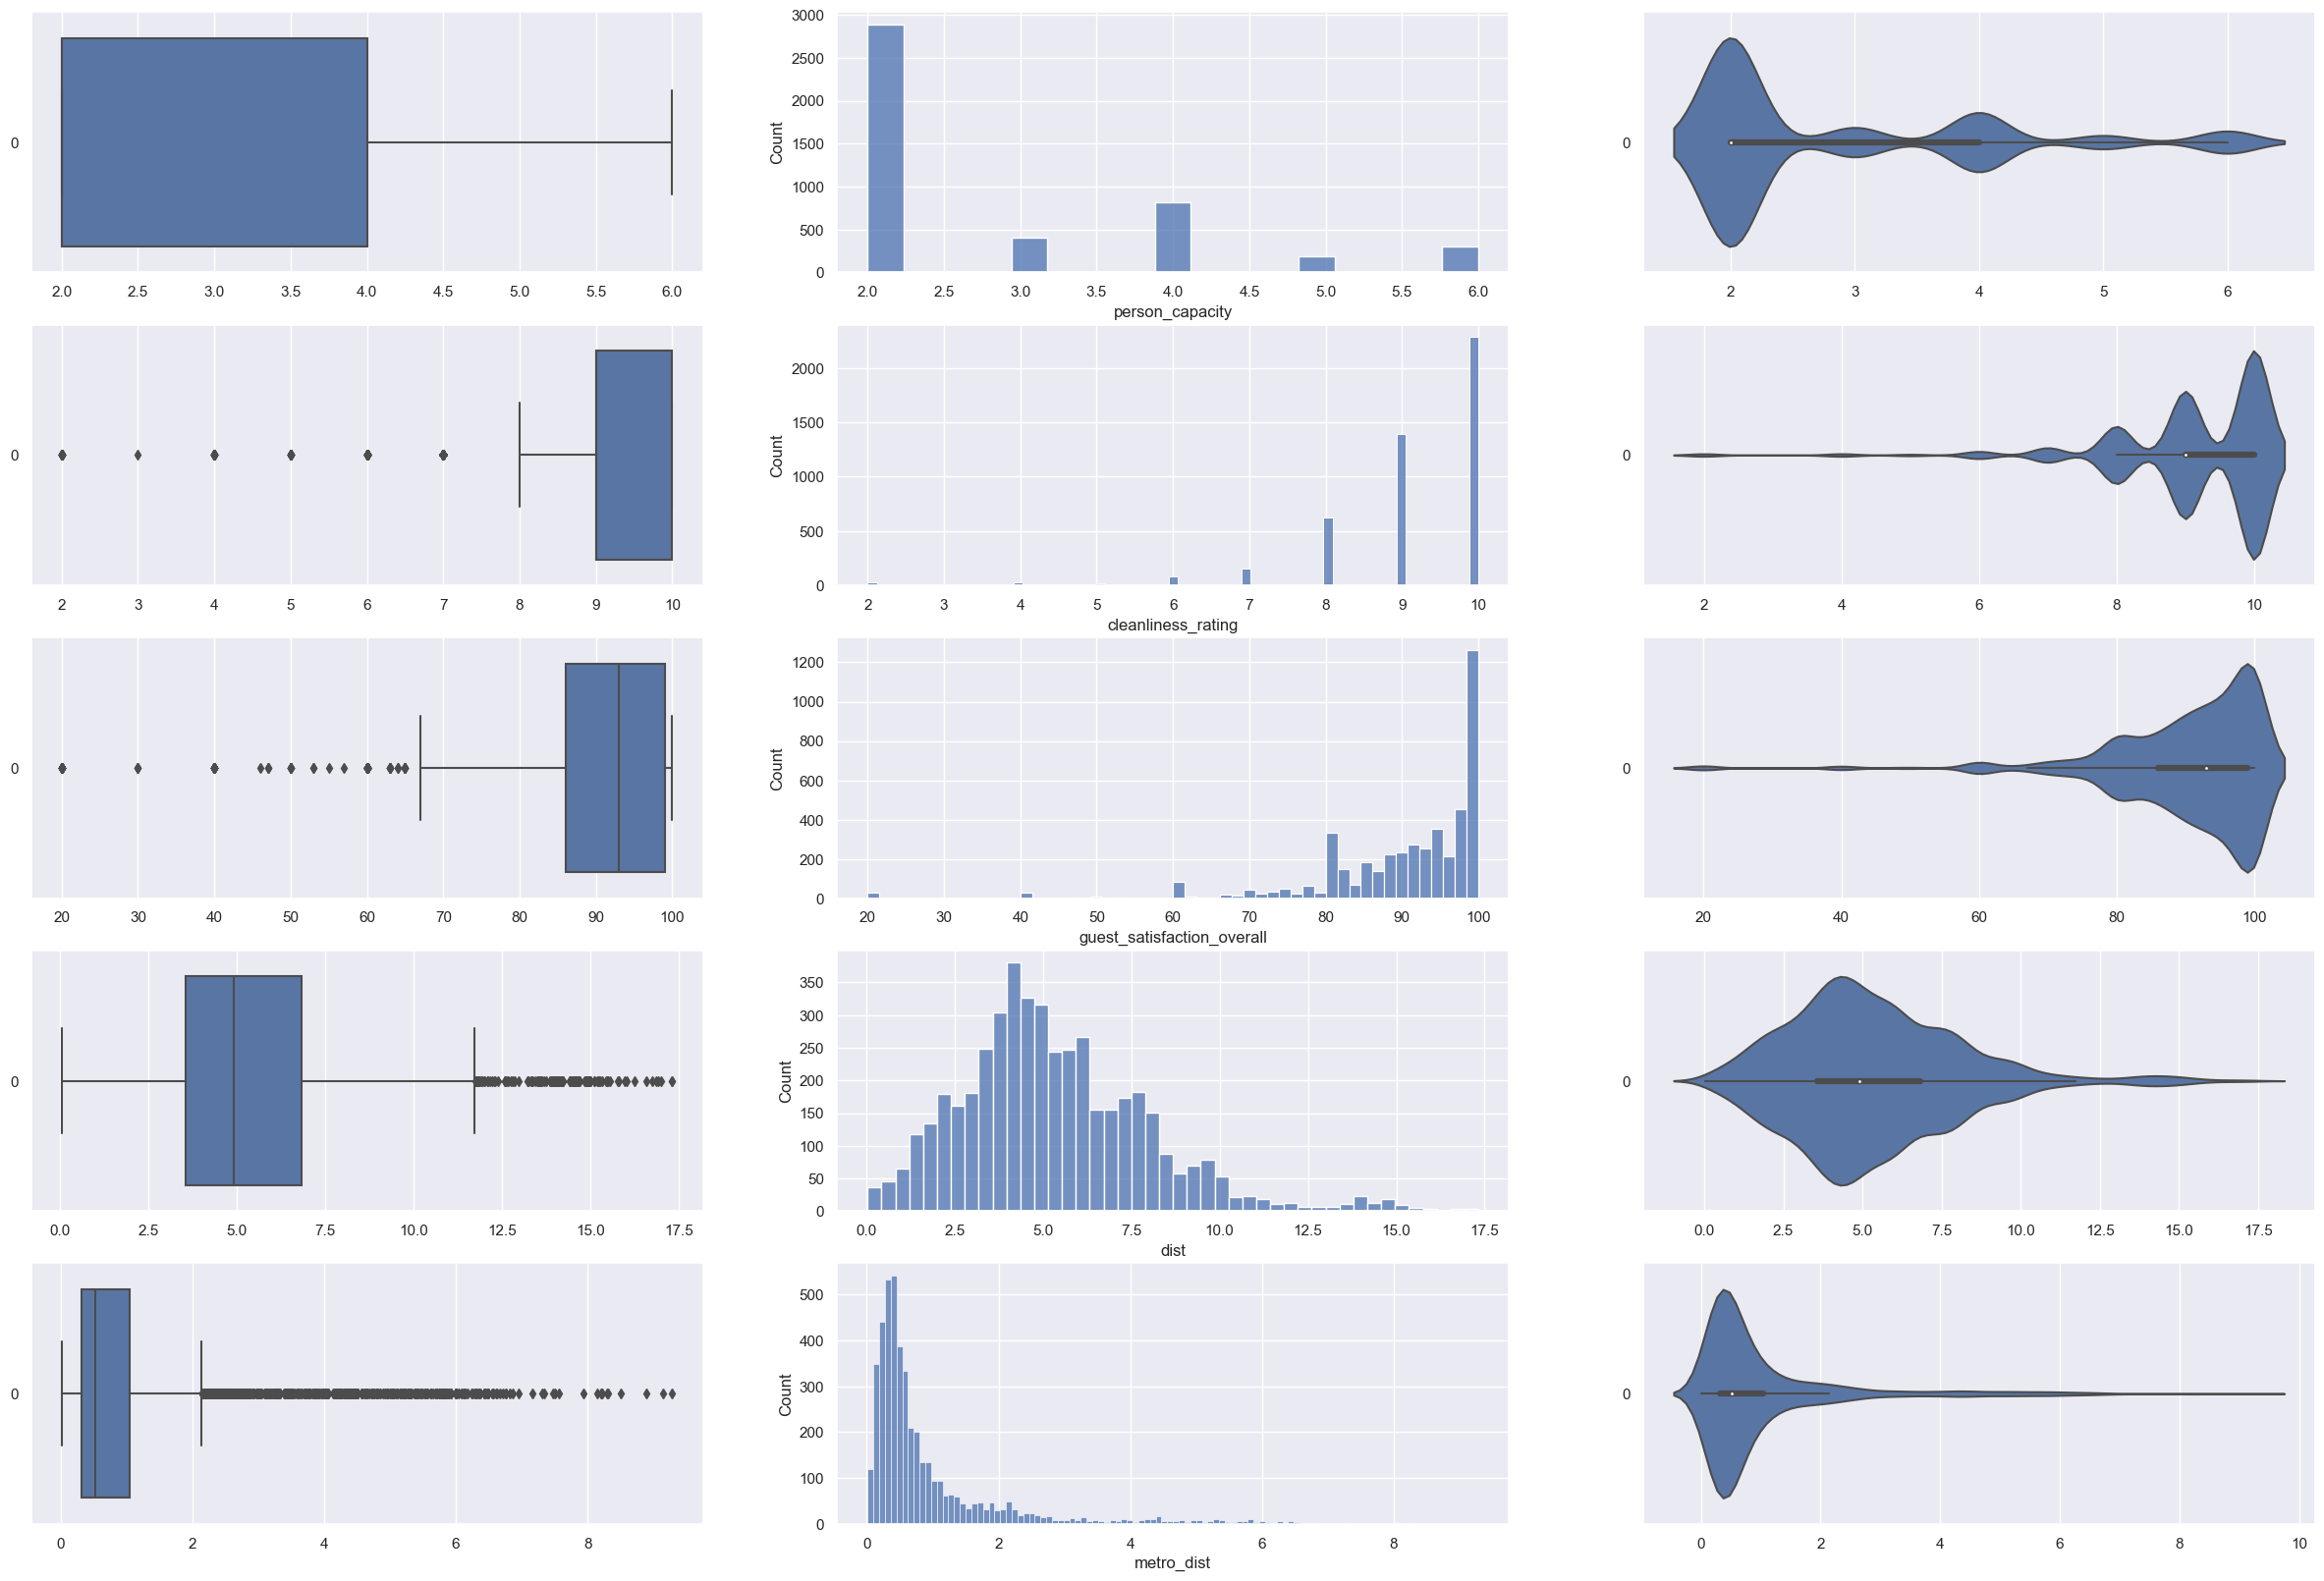

In [6]:
analyse_var = ['person_capacity', 'cleanliness_rating', 'guest_satisfaction_overall', 'dist', 'metro_dist']
f, axes = plt.subplots(5, 3, figsize=(30, 20))
count = 0
for var in analyse_var:
    sb.boxplot(data = traindata[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = traindata[var], ax = axes[count,1])
    sb.violinplot(data = traindata[var], orient = "h", ax = axes[count,2])
    count += 1

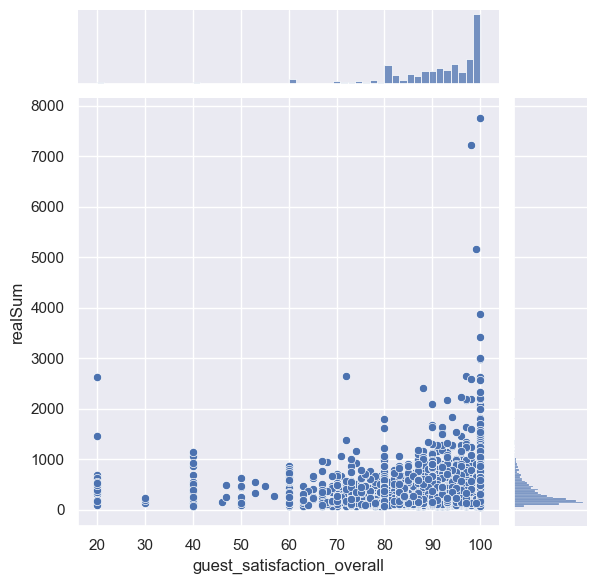

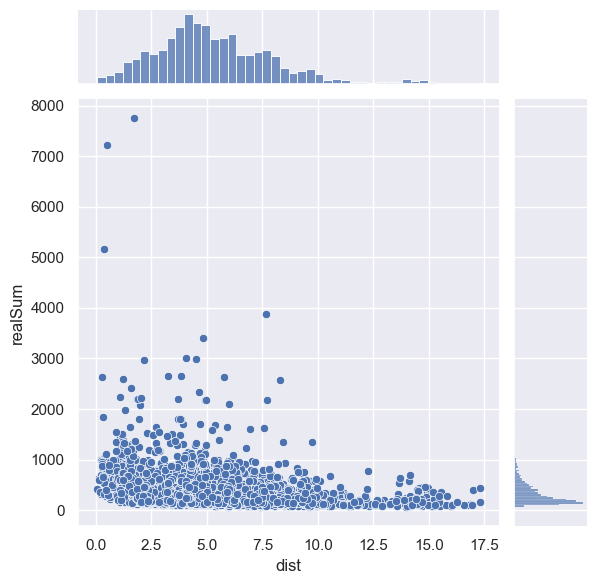

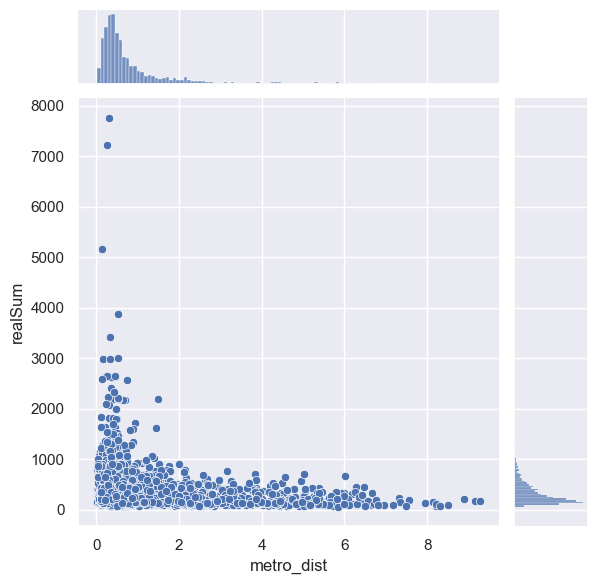

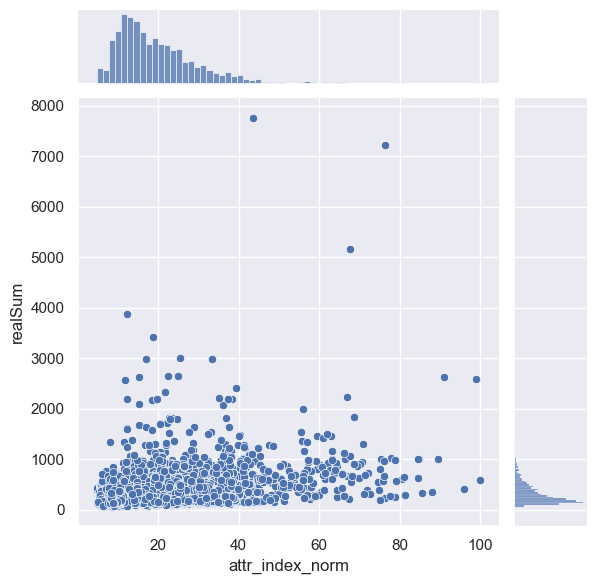

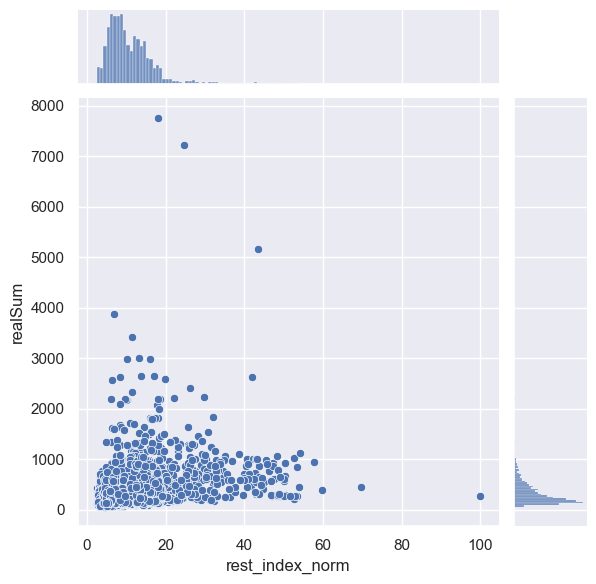

In [37]:
analyse_var = ['guest_satisfaction_overall', 'dist', 'metro_dist', "attr_index_norm", "rest_index_norm"]
df = traindata[traindata['realSum'] < 10000]
for var in analyse_var:
    sb.jointplot(data=df, x=var, y="realSum")

## Categorial Variables

Column Name | Description
----------- | -----------
realSum | The total price of the Airbnb listing. (Numeric)
room_type | The type of room offered (e.g. private room, shared room, entire home/apt). (Categorical)
room_shared | Whether the room is shared or not. (Boolean)
room_private | Whether the room is private or not. (Boolean)
host_is_superhost | Whether or not a particular host is identified as a superhost on Airbnb. (Boolean)

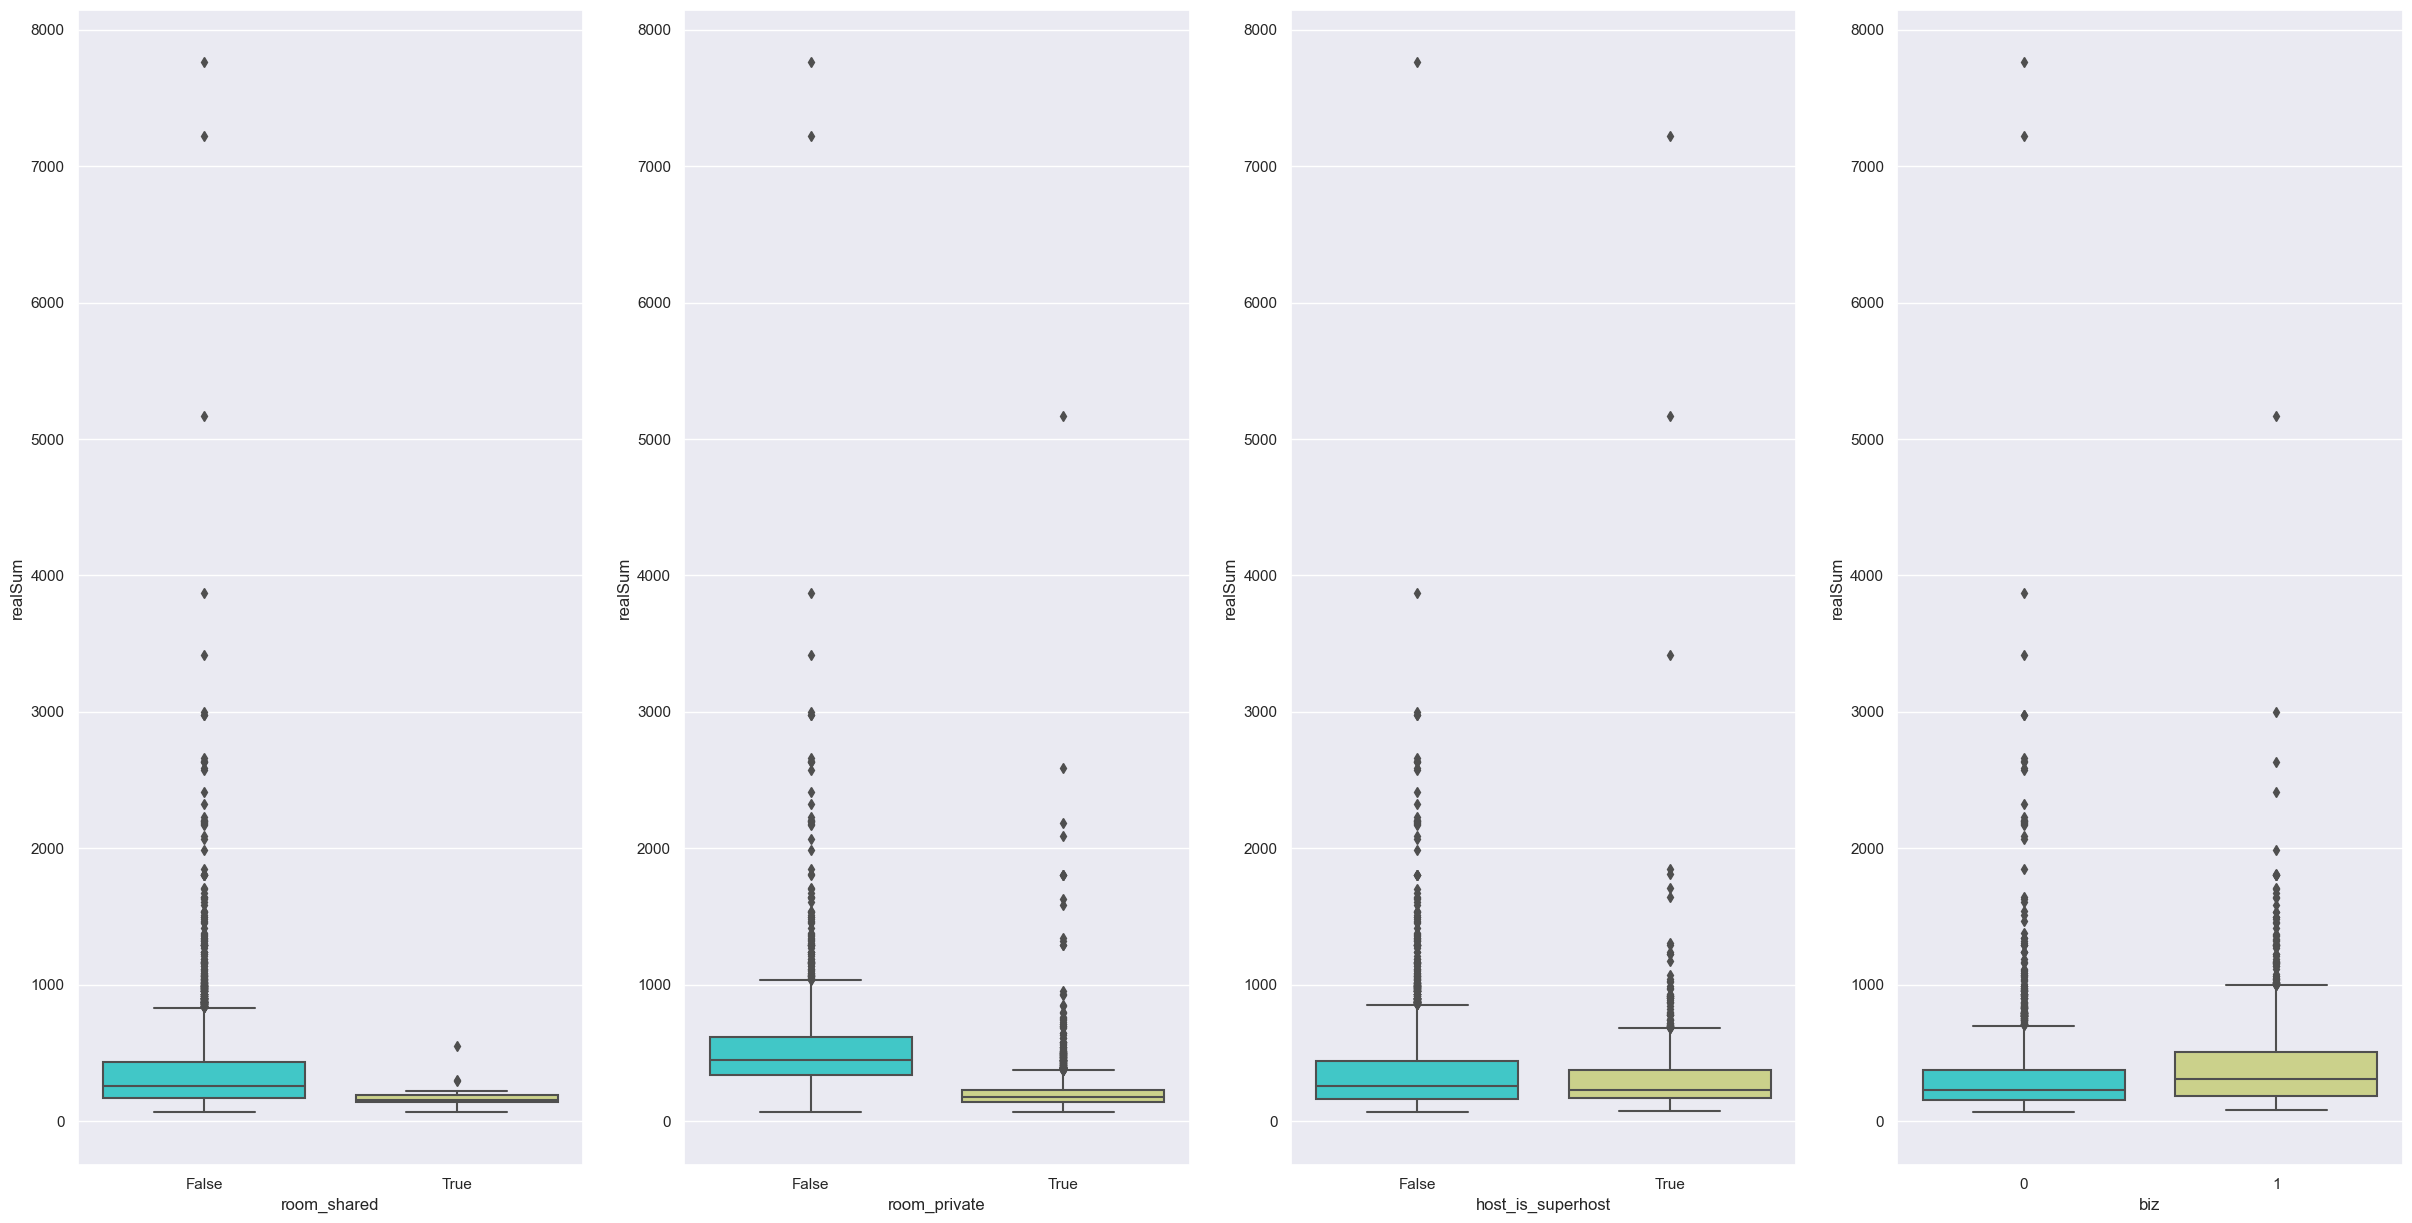

In [34]:
analyse_var = ['room_shared', 'room_private', 'host_is_superhost', 'biz']
df = traindata[traindata['realSum'] < 10000]
f, axes = plt.subplots(1, 4, figsize=(30, 15))
count = 0
for var in analyse_var:
    sb.boxplot(x=var, y="realSum", data=df, palette='rainbow', ax = axes[count])
    count += 1

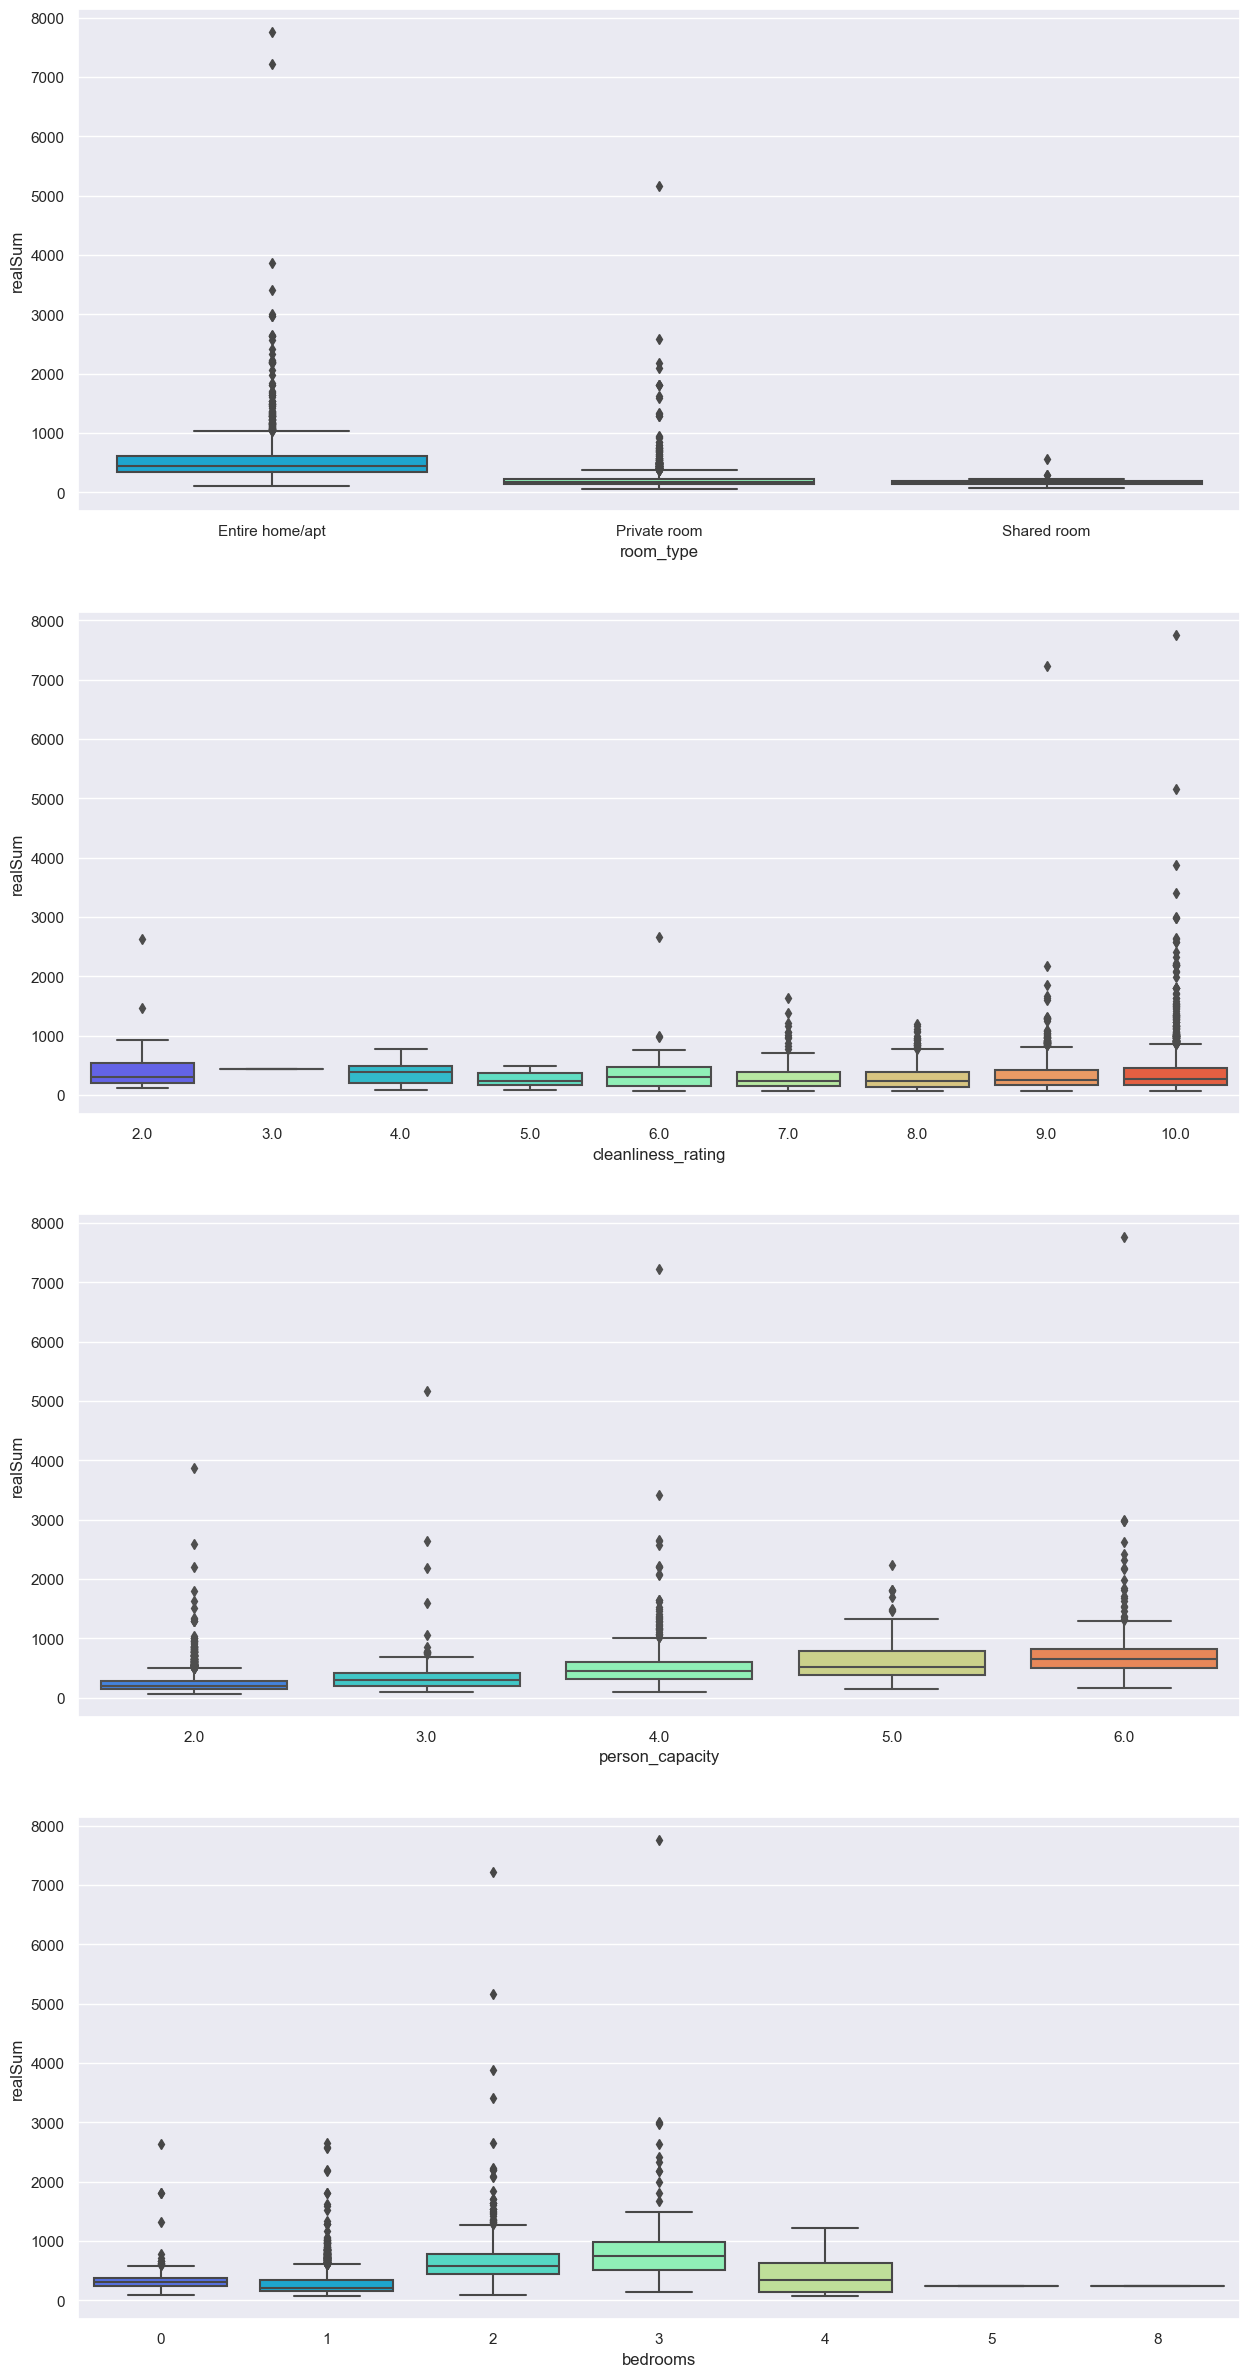

In [36]:
analyse_var = ['room_type', 'cleanliness_rating', 'person_capacity', 'bedrooms']
f, axes = plt.subplots(4, 1, figsize=(15, 30))
df = traindata[traindata['realSum'] < 10000]
count = 0
for var in analyse_var:
    sb.boxplot(x=var, y="realSum", data=df, palette='rainbow', ax = axes[count])
    count += 1

### Quick check on room_type and person_capacity

<Axes: xlabel='room_type', ylabel='person_capacity'>

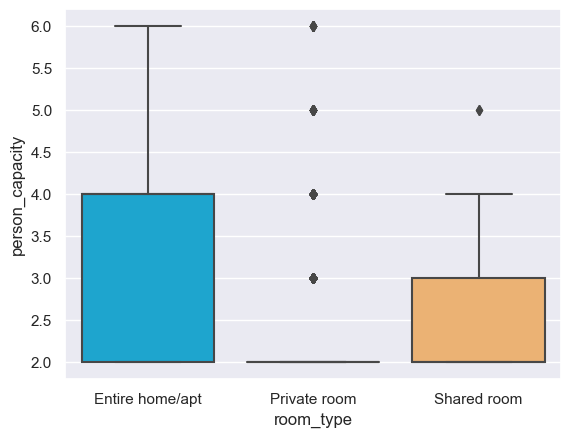

In [28]:
sb.boxplot(data=df, x="room_type", y="person_capacity", palette='rainbow')

## Combining Categorials with Numerics
Using pairplot with hue.
- `dist` and `metro_dist` are decent numerics.
- `room_type` and `person_capacity` are decent categorials.

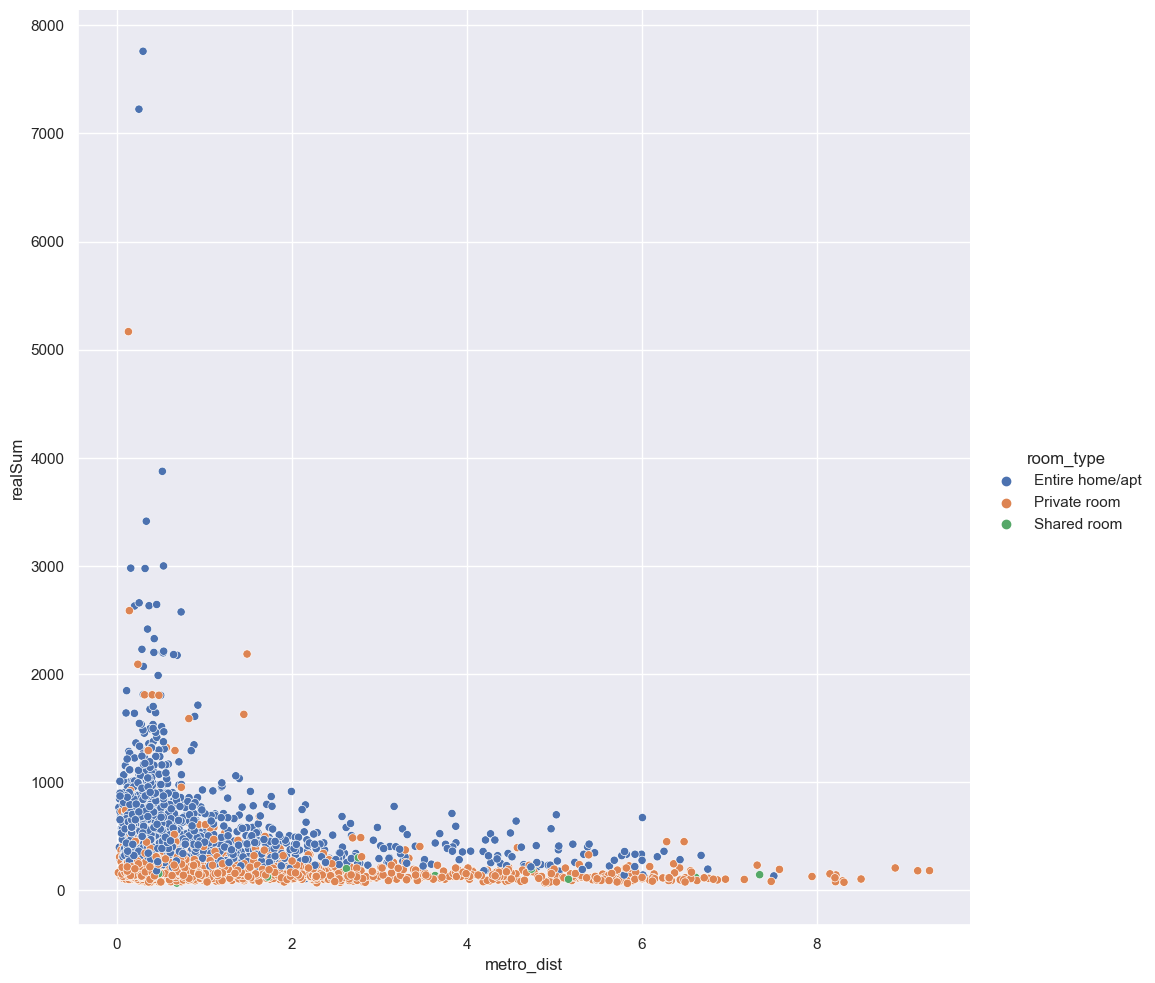

In [14]:
df = traindata[traindata['realSum'] < 10000]
sb.pairplot(data=df, x_vars="metro_dist", y_vars="realSum", hue='room_type', height=10)

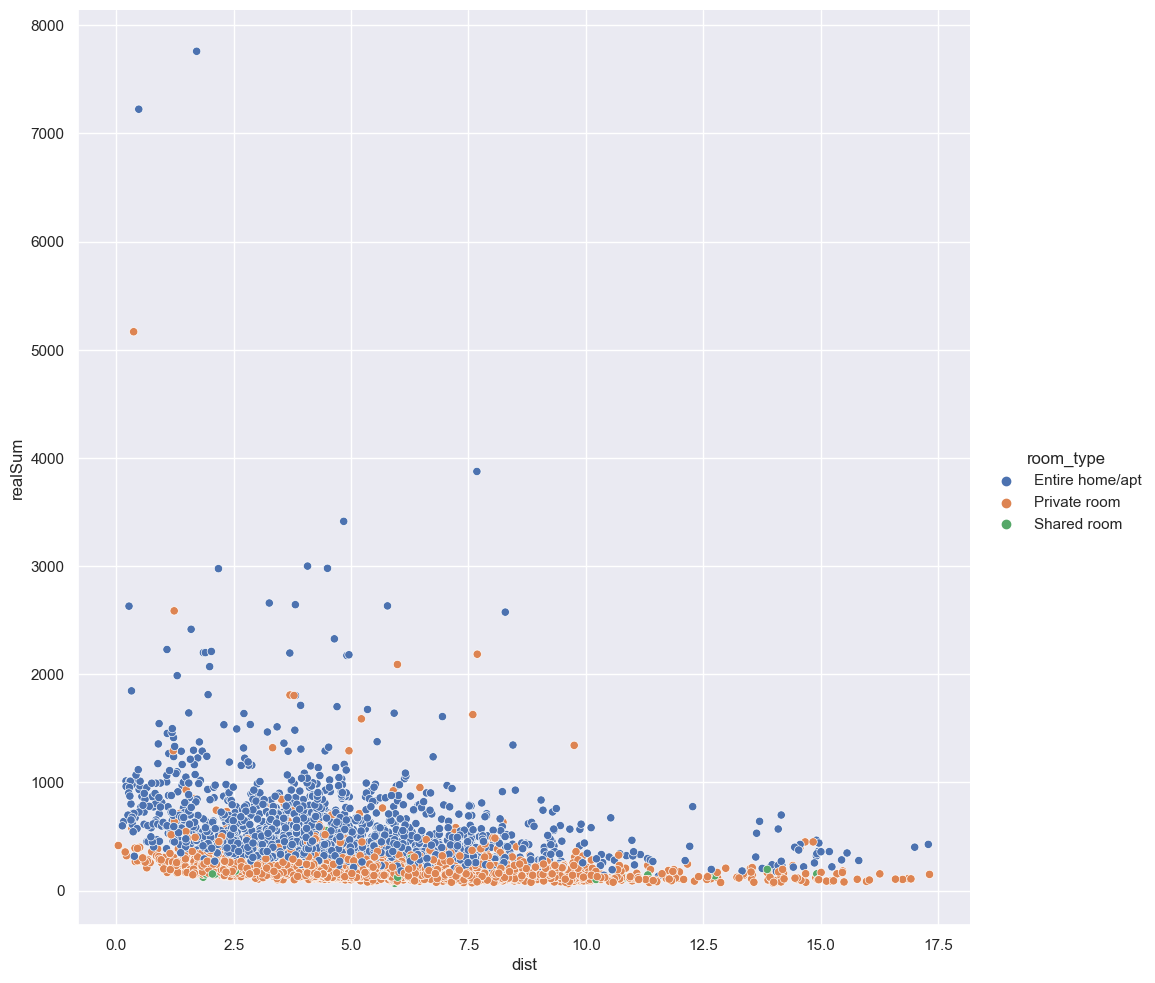

In [29]:
sb.pairplot(data=df, x_vars="dist", y_vars="realSum", hue='room_type', height=10)

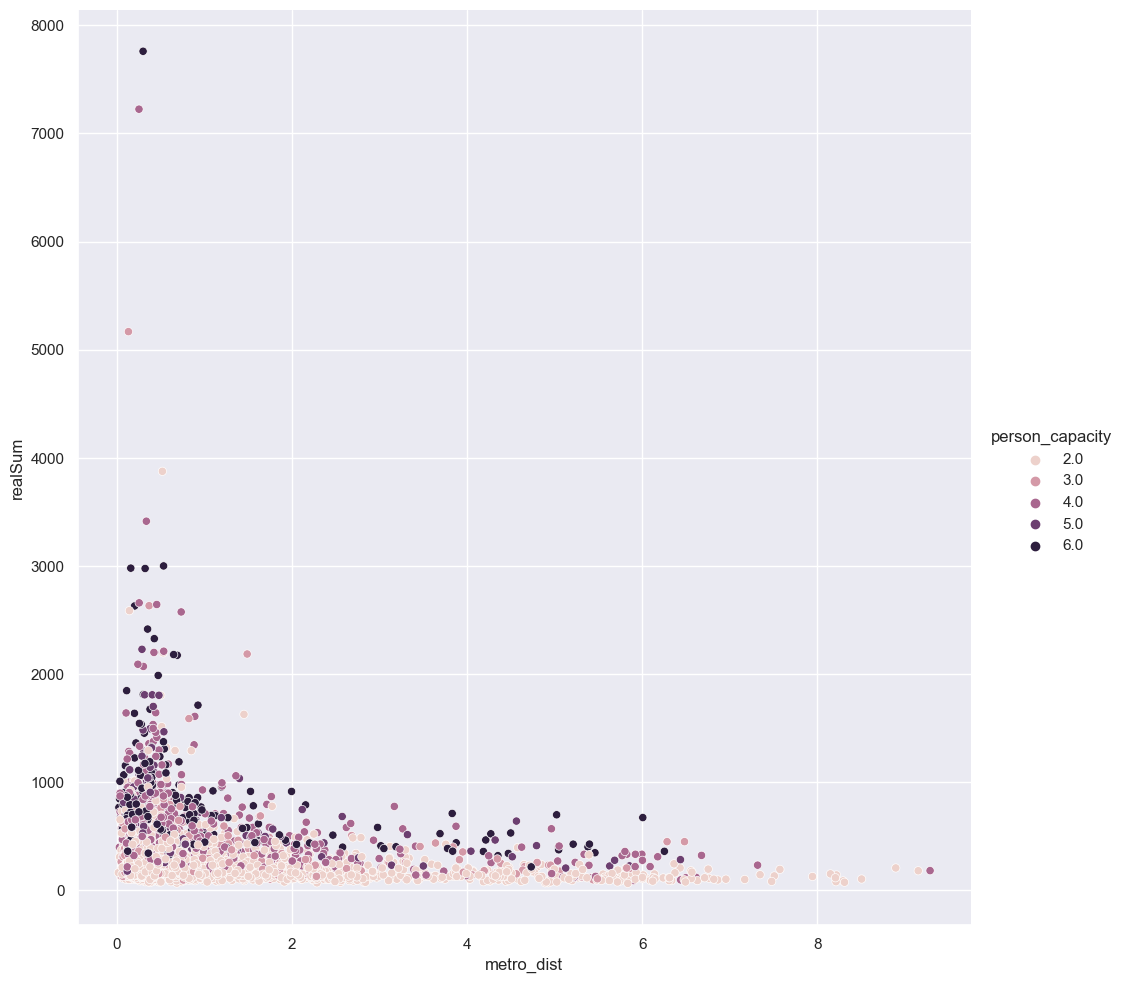

In [31]:
sb.pairplot(data=df, x_vars="metro_dist", y_vars="realSum", hue='person_capacity', height=10)

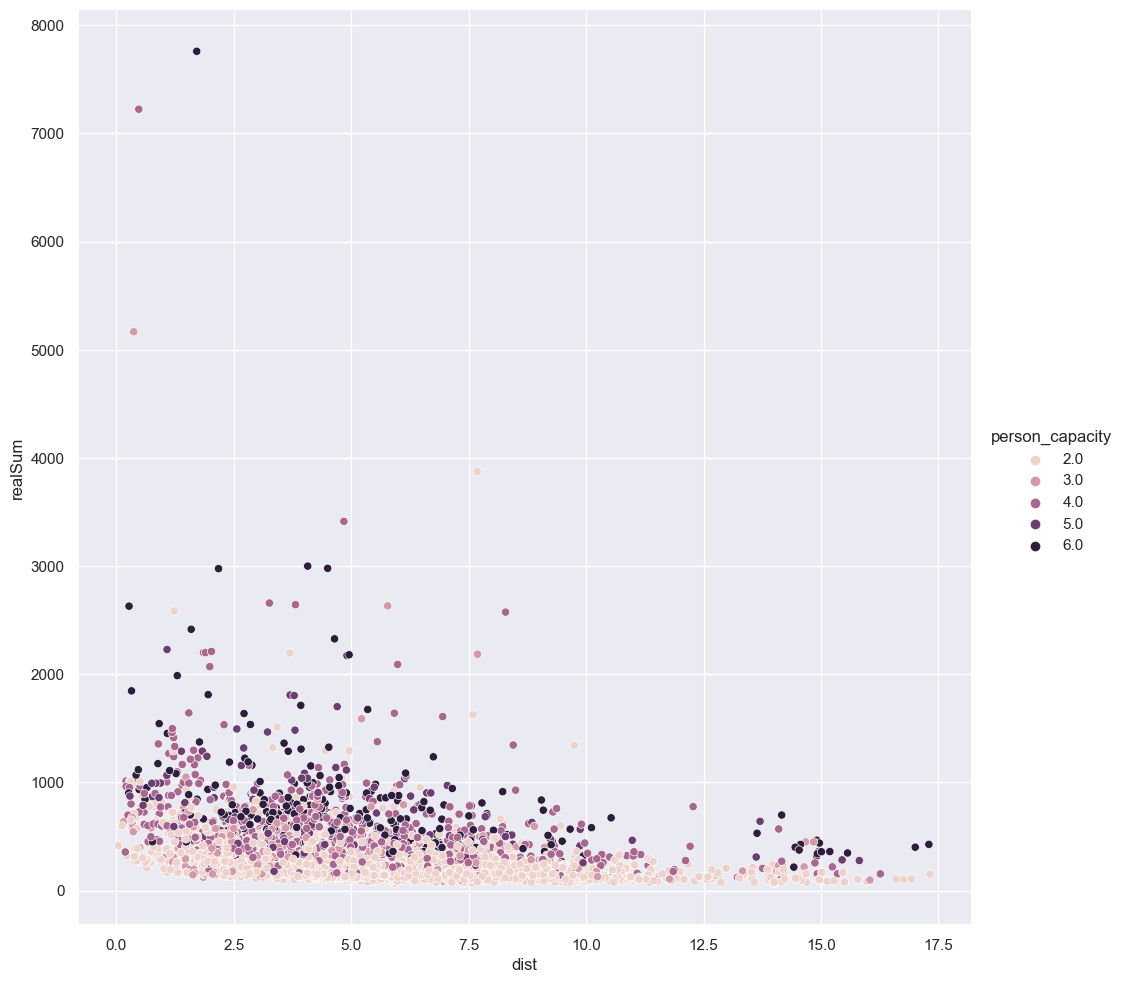

In [32]:
sb.pairplot(data=df, x_vars="dist", y_vars="realSum", hue='person_capacity', height=10)

## Cleanliness and satisfaction

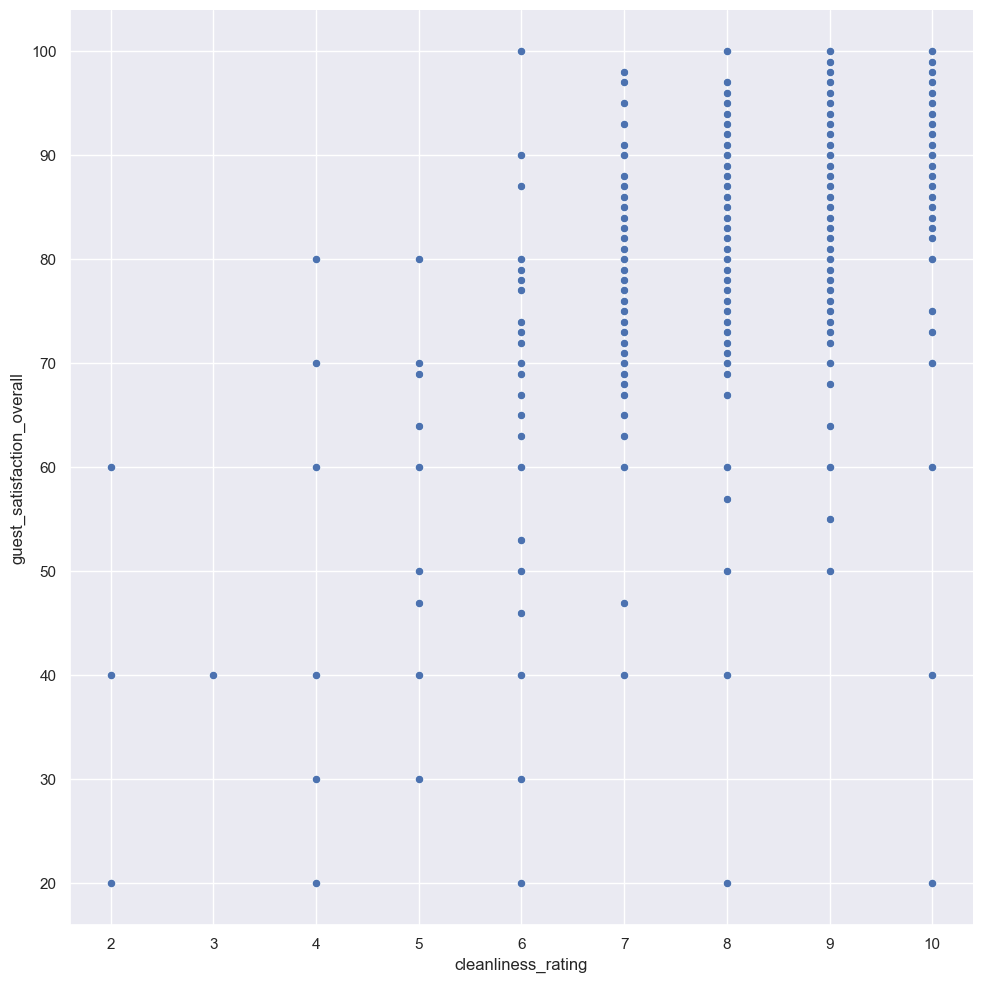

In [12]:
sb.pairplot(data=traindata, y_vars="guest_satisfaction_overall", x_vars="cleanliness_rating", height=10)